# Wykrywanie krawędzi

In [1]:
import cv2
from matplotlib import pyplot as plt

def plot_cv2(image):
    plt.imshow(
        cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    )

plt.rcParams['figure.figsize'] = [16, 8]

### a) Proszę wczytać przykładowy obraz *lab5_1.jpg* i skonwertować go do obrazu w skali szarości.


Wymiary obrazu:  (400, 520, 3)


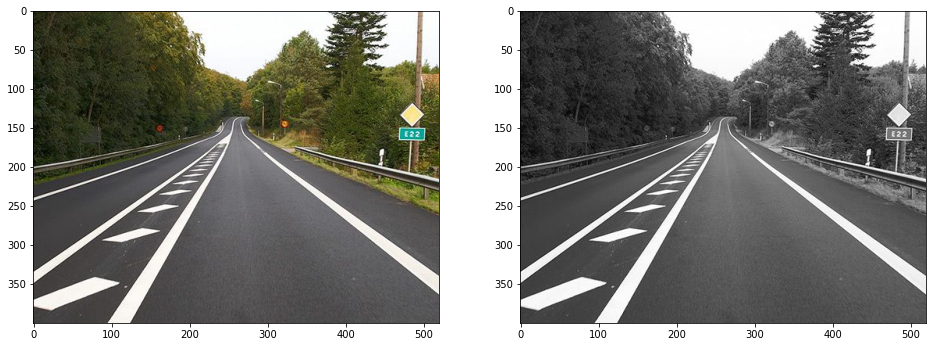

In [2]:
image = cv2.imread("lab5_1.jpg")
print(f"Wymiary obrazu:  {image.shape}")
f = plt.figure()
ax = f.add_subplot(1, 2, 1)
plot_cv2(image)

image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ax = f.add_subplot(1, 2, 2)
plt.imshow(image_gray, cmap='gray');

---

### b) Proszę sprawdzić i porównać wynik wykrywania krawędzi ponizszymi metodami dla obrazu oryginalnego i obrazu z nałożonym filtrem gaussowskim (5x5). Wynikowy obraz można poddać progowaniu. 

#### Laplace

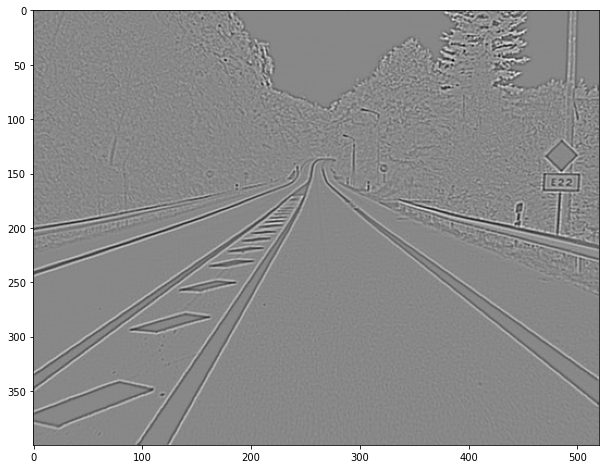

In [3]:
laplace = cv2.Laplacian(
    src = image_gray, 
    ddepth = cv2.CV_16S, #1 channel of signed 2-byte integer
    ksize = 5
)

plt.imshow(laplace, cmap='gray');

#### Canny

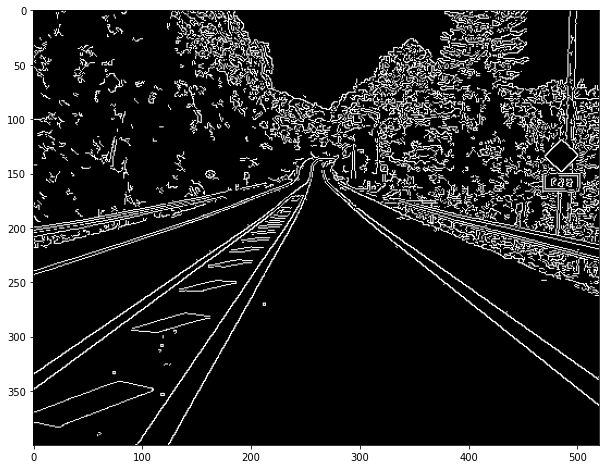

In [4]:
canny = cv2.Canny(
    image_gray, 
    threshold1 = 100, 
    threshold2 = 200
) 

plt.imshow(canny, cmap='gray');

---

### c) Proszę zbadać wpływ parametrów `minVal`, `maxVal` i `kSize` na wynik działania algorytmu Canny.

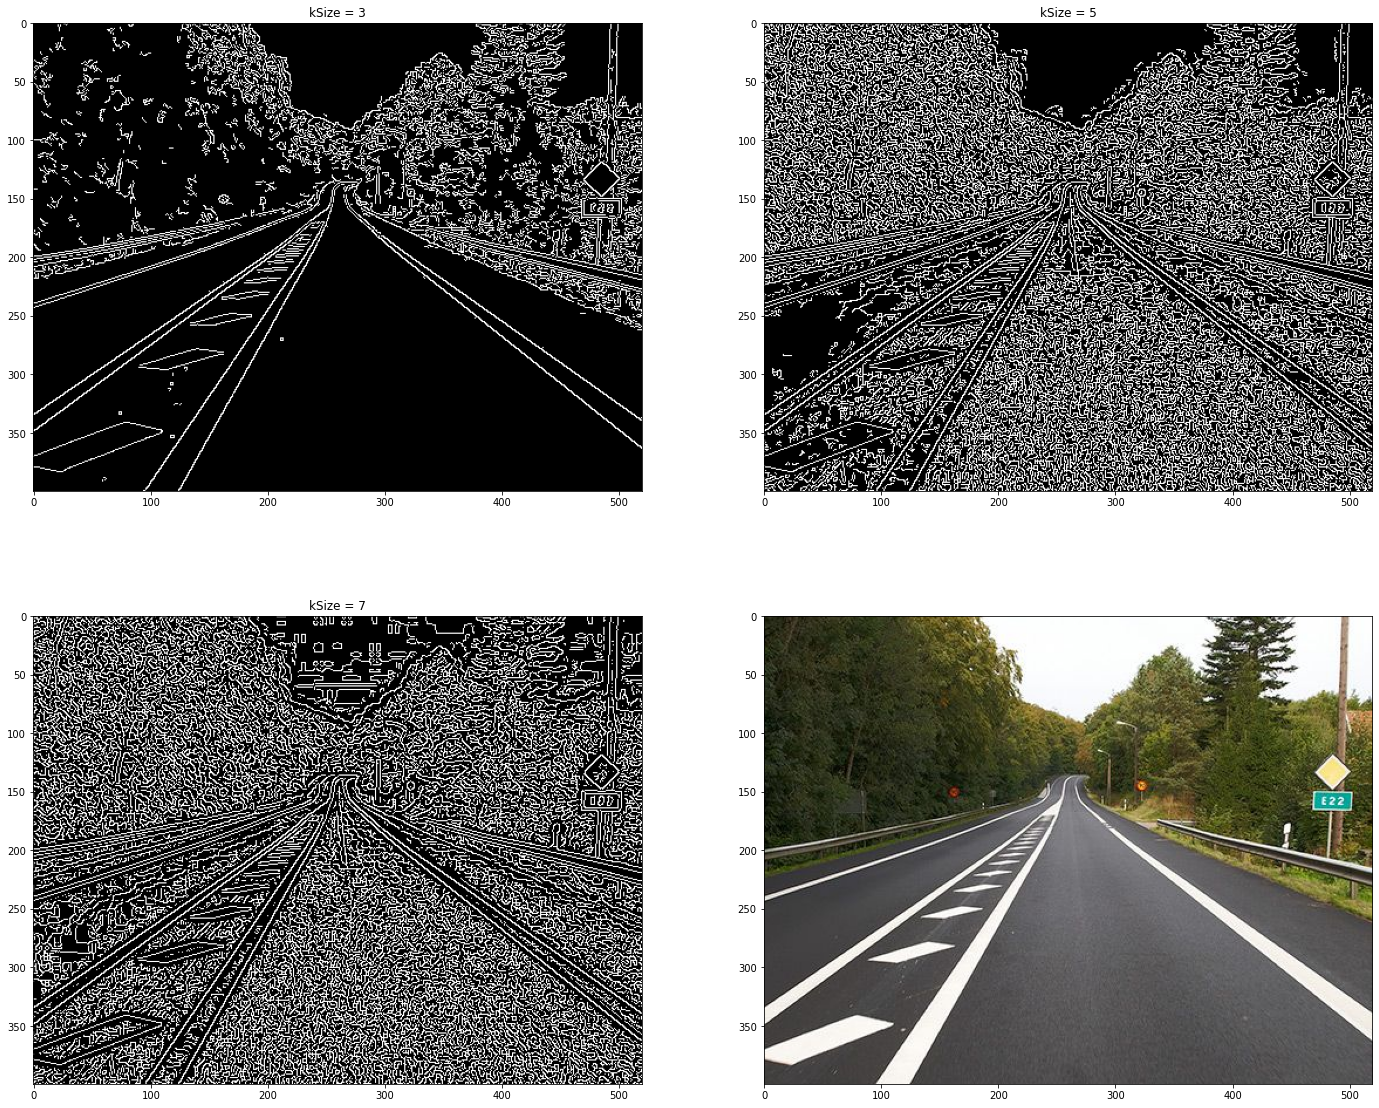

In [5]:
kSizes = [3, 5, 7]
f = plt.figure(figsize=(24, 20))

for i, kSize in enumerate(kSizes):

    canny = cv2.Canny(
        image_gray, 
        threshold1 = 100, 
        threshold2 = 200,
        apertureSize = kSize
    ) 
    
    ax = f.add_subplot(2, 2, i+1)
    plt.imshow(canny, cmap='gray');
    ax.set_title(f"{kSize = }")
f.add_subplot(2, 2, 4)
plot_cv2(image)

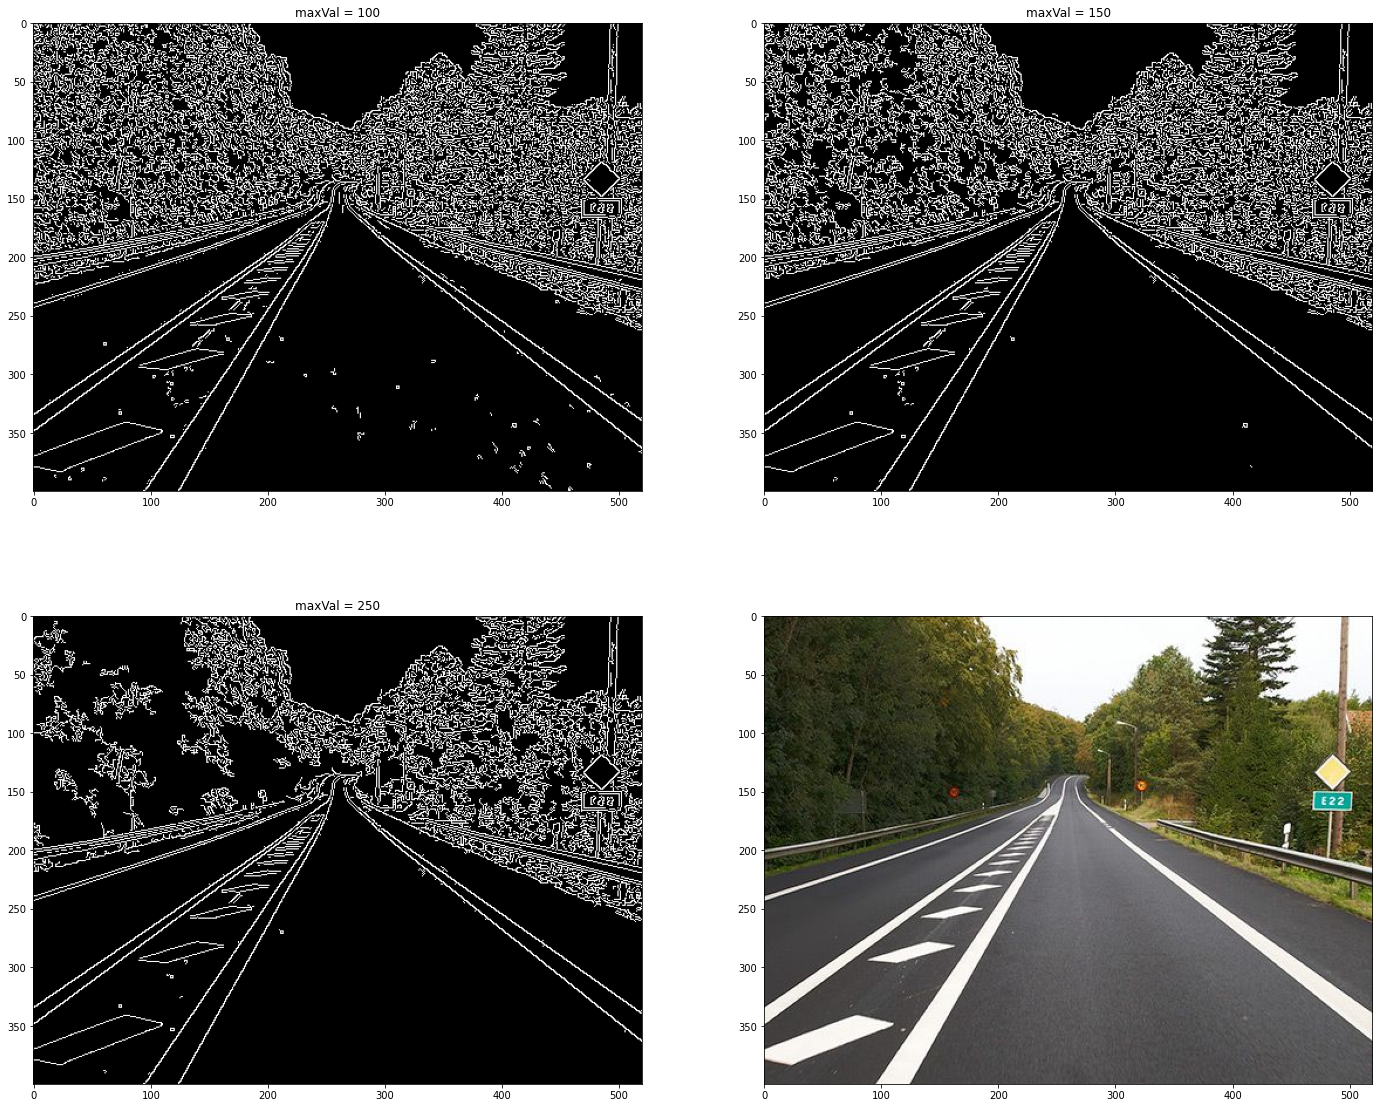

In [6]:
maxVals = [100, 150, 250]
f = plt.figure(figsize=(24, 20))

for i, maxVal in enumerate(maxVals):

    canny = cv2.Canny(
        image_gray, 
        threshold1 = 50, 
        threshold2 = maxVal
    ) 
    
    ax = f.add_subplot(2, 2, i+1)
    plt.imshow(canny, cmap='gray');
    ax.set_title(f"{maxVal = }")
f.add_subplot(2, 2, 4)
plot_cv2(image)

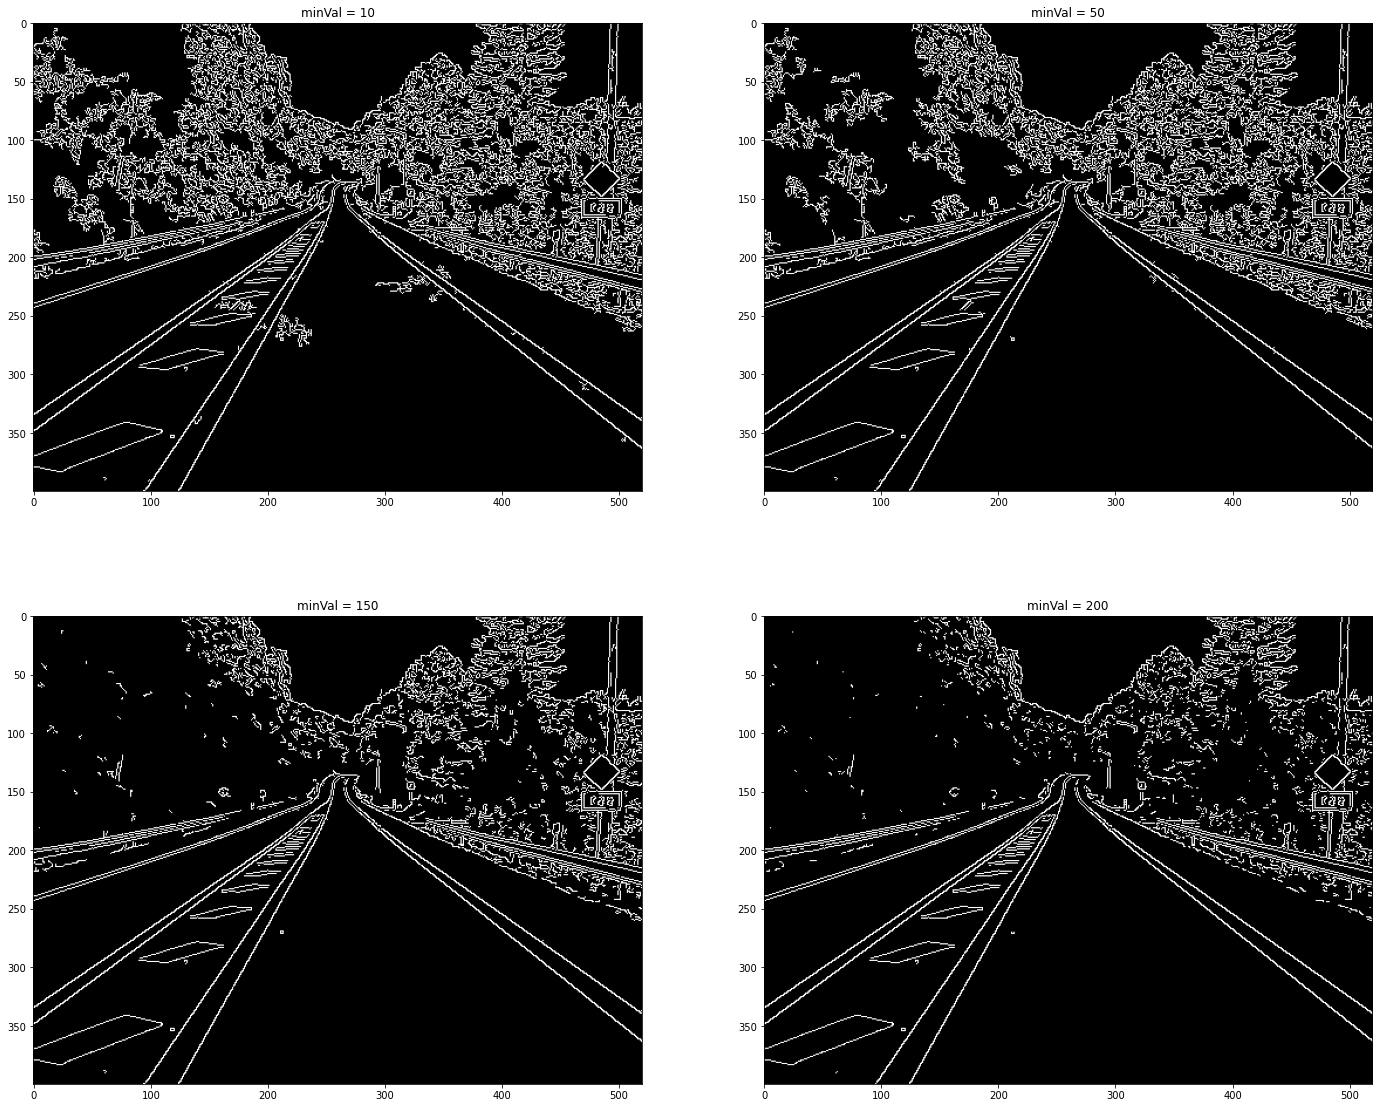

In [7]:
minVals = [10, 50, 150, 200]
f = plt.figure(figsize=(24, 20))

for i, minVal in enumerate(minVals):

    canny = cv2.Canny(
        image_gray, 
        threshold1 = minVal, 
        threshold2 = 255
    ) 
    
    ax = f.add_subplot(2, 2, i+1)
    plt.imshow(canny, cmap='gray');
    ax.set_title(f"{minVal = }")
# f.add_subplot(2, 2, 4)
# plot_cv2(image)

---

### d) Proszę dokonać wykrywania linii metodą transformacji Hough 

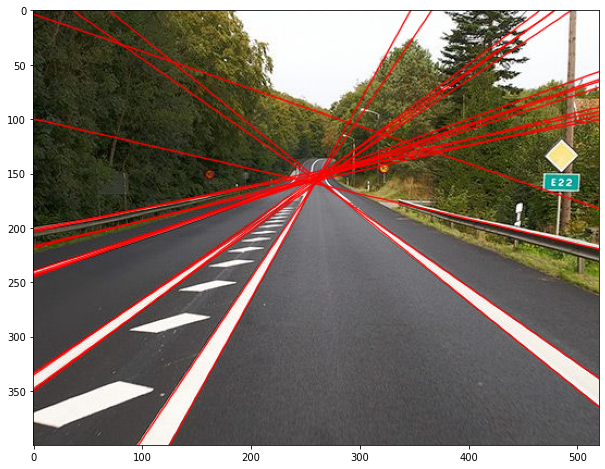

In [8]:
import numpy as np
import math

canny = cv2.Canny(
        image_gray, 
        threshold1 = 50, 
        threshold2 = 200,
        apertureSize = 3
    ) 

image_copy = image.copy()

# This returns an array of r and phi values
lines = cv2.HoughLines(
    canny, 
    rho = 1, 
    theta = np.pi / 180, 
    threshold = 200
)


for line in lines:
    r = line[0][0]
    phi = line[0][1]
    a = math.cos(phi)
    b = math.sin(phi)
    x0 = a * r
    y0 = b * r
    pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
    pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
    cv2.line(
        image_copy, 
        pt1 = pt1, 
        pt2 = pt2, 
        color = (0,0,255), 
        thickness = 1, 
        lineType = cv2.LINE_AA
    )
    
plt.imshow(
    cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)
)

---

### e) Proszę zbadać wpływ progu na wynik działania transformacji Hough

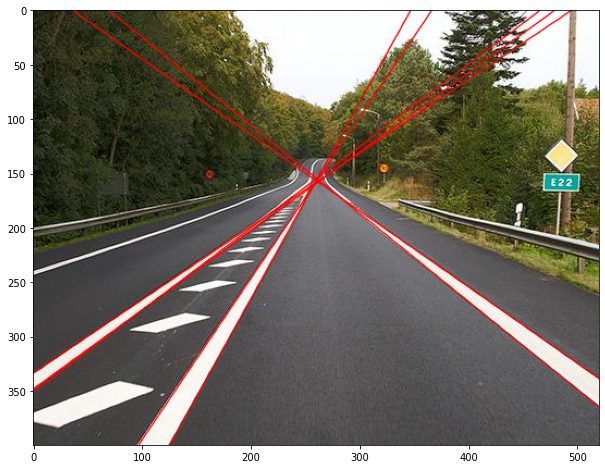

In [9]:
import numpy as np
import math

canny = cv2.Canny(
        image_gray, 
        threshold1 = 80, 
        threshold2 = 120,
        apertureSize = 3
    ) 

image_copy = image.copy()

lines = cv2.HoughLines(
    canny, 
    rho = 1, 
    theta = np.pi / 180, 
    threshold = 230
)

for line in lines:
    r = line[0][0]
    phi = line[0][1]
    a = math.cos(phi)
    b = math.sin(phi)
    x0 = a * r
    y0 = b * r
    pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
    pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
    cv2.line(
        image_copy, 
        pt1 = pt1, 
        pt2 = pt2, 
        color = (0,0,255), 
        thickness = 1, 
        lineType = cv2.LINE_AA
    )
    
plt.imshow(
    cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)
)

---

### f) Proszę wczytać drugi z przykładowych obrazów *lab5_2.png*, podobnie go skonwertować i dokonać wykrywania okręgów

Wymiary obrazu:  (1848, 1840, 3)
Wymiary obrazu:  (924, 920, 3)


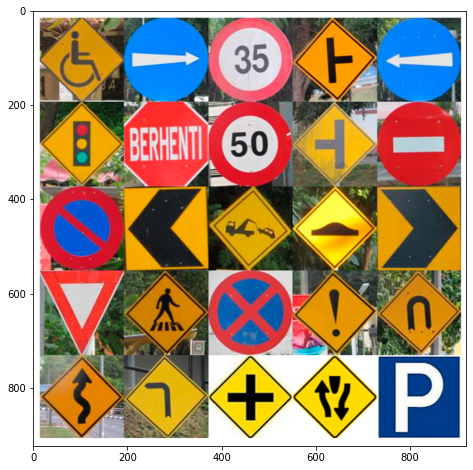

In [10]:
image = cv2.imread("lab5_2.png")
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(f"Wymiary obrazu:  {image.shape}")
image = cv2.resize(
    image, 
    dsize = None, 
    fx = 0.5, 
    fy = 0.5,
    interpolation = cv2.INTER_NEAREST
)
print(f"Wymiary obrazu:  {image.shape}")
plot_cv2(image)

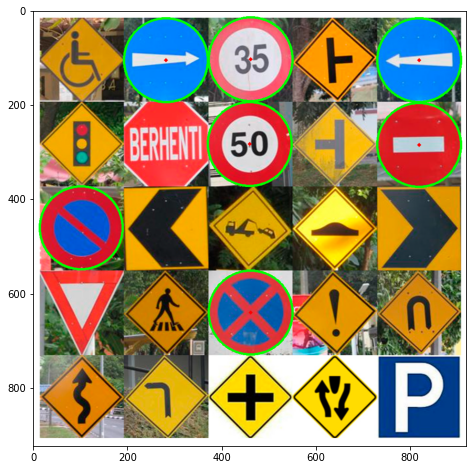

In [11]:
image_copy = image.copy()
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

img_gauss_blur = cv2.GaussianBlur(
    image_gray, 
    (5, 5), 
    0, #automatyczne wyliczenie parametru sigma w obu kierunkach
)

circles = cv2.HoughCircles(
    img_gauss_blur,
    method = cv2.HOUGH_GRADIENT,
    dp = 1, #ratio of the resolution of original image to the accumulator matrix
    minDist = 80, #minimum distance between detected circles
    param1 = 60, #Canny edge detection requires two parameters — minVal and maxVal. Param1 is the higher threshold of the two. The second one is set as half of this value
    param2 = 21, #accumulator threshold for the candidate detected circles
    minRadius = 85,
    maxRadius = 90
)

circles = np.uint16(np.around(circles))

for circle in circles[0,:]:
    #draw the circle
    cv2.circle(
        image_copy, 
        center = (circle[0], circle[1]),
        radius = circle[2],
        color = (0, 255, 0),
        thickness = 4
    )
    
    # draw the center of the circle
    cv2.circle(
        image_copy, 
        center = (circle[0], circle[1]),
        radius = 2,
        color = (0, 0, 255),
        thickness = 3
    )
    
plt.imshow(
    cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)
)